# CM3005 - Data Science Midterm

## Task 1: Domain-Specific Area and Project Objectives

This project focuses on the environmental health research, addressing the challenge of dengue fever prediction in environments with tropical climate. Dengue fever still remains a health challenge in Singapore, with its tropical climate, it creates an ideal conditions for disease transmission. The desease outbreaks poses risks to the population health and healthare resources. This project aims to develop a linear regression model that extinguish the relationship between weather and dengue cases, allowing us to predict and mitigate the disease outbreaks.

Linear regression is an approach that helps us understand how different factors can have some form of relationship that may leads to some serious causes. In this project, this approach allows us to examine the relationship between weather conditions and disease transmission. By analysing weather temperature, rainfall, windspeed, the linear regression model can identify environmental factors that contributes to disease spread. By understanding the factors and relationship, the model will provide a tool for predicting disease outbreak possibilities.

By utilising the linear regression model, the research addressed the challenge where the predictive capabilities in current disease monitering systems are limited. With the linear regression model, it creates an early warning system for the relevant authorities for potential dengue outbreaks. This system allows the relevant authorities to implement prevention strategies, as well as spreading awareness to the public improve the community health preparedness.


## Task 2: Dataset Description
This project utilises a dataset that contains two CSV, namely `sg_weather_record` and `sg_dengue_record`.

**1. Singapore Weather Data `(sg_weather_record)`:**

Singapore weather dataset, collected by the National Environment Agency (NEA) of Singapore providing Singapore's historical daily weather records ranging from 2009 to 2017. This dataset was acquired from a public source at Singapore's Open Data Portal, ensuring that the data is accurate and reliable. The data were stored in a CSV file, containing approximately 2800 entries.

Data Source:
https://data.gov.sg/datasets?resultId=d_03bb2eb67ad645d0188342fa74ad7066&page=1

Column Legend:
|           Title          |        Column name       |     Data type     | Unit of measure |
|:------------------------:|:------------------------:|:-----------------:|:---------------:|
| Date                     | date                     | Date (YYYY-MM-DD) | -               |
| Station                  | station                  | Text              | -               |
| Daily rainfall total     | daily_rainfall_total     | Numeric           | mm              |
| Highest 30 min rainfall  | highest_30_min_rainfall  | Numeric           | mm              |
| Highest 60 min rainfall  | highest_60_min_rainfall  | Numeric           | mm              |
| Highest 120 min rainfall | highest_120_min_rainfall | Numeric           | mm              |
| Mean temperature         | mean_temperature         | Numeric           | Degrees celcius |
| Maximum temperature      | maximum_temperature      | Numeric           | Degrees celcius |
| Minimum temperature      | minimum_temperature      | Numeric           | Degrees celcius |
| Mean wind speed          | mean_wind_speed          | Numeric           | Km/h            |
| Max wind speed           | max_wind_speed           | Numeric           | Km/h            |

<br>

**2. Singapore Dengue Outbreak Data `(sg_weather_record)`:**

Singapore dengue outbreak dataset, collected by the Ministry of Health (MOH) of Singapore providing weekly number of lab-confirmed dengue and dengue haemorrhagic fever cases from 2014 to 2018 in Singapore. This dataset was acquired from a public source at Singapore's Open Data Portal, ensuring that the data is accurate and reliable. The data were stored in a CSV file, containing approximately 530 entries.

Data Source:
https://data.gov.sg/datasets?resultId=d_ac1eecf0886ff0bceefbc51556247015&page=1

Column Legend:
|    Title    | Column name |  Data type  | Unit of measure |
|:-----------:|:-----------:|:-----------:|:---------------:|
| Year        | year        | Year (YYYY) | -               |
| Eweek       | eweek       | Numeric     | Week            |
| Type dengue | type_dengue | Text        | -               |
| Number      | number      | Text        | -               |

## Task 3: Data Preparation

Both of the data from the dataset were provided in the CSV file format, which is common way to store data in a tabular format. The weather dataset contains daily data, including redundant columns like windspeed, weather station and more, which I will remove to focus on the relevant data. Since the dengue dataset is arranged by epidemiological weeks (eweeks), while the weather dataset is daily, I will convert the weather data to match the eweek format by aggregating daily records into weekly data.
The dengue dataset's structure with "Type" as the column header can result in repeated weather conditions and other information when merging both data in one dataset. To address this issue, I will also pivot the dengue data, creating two new separated columns for dengue and DHF cases. This change will avoid duplication of data when merging. Finally, I will merge both dataframe into a single dataframe by inner joining them based on year and eweek.

In [1]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

In [3]:
# Path to the datasets
weather_record_path = 'csv/sg_weather_record.csv'
dengue_record_path = 'csv/sg_dengue_record.csv'

# Load and read the datasets
weather_data = pd.read_csv(weather_record_path)
dengue_data = pd.read_csv(dengue_record_path)

# Print the datasets information
print('\nSingapore Weather Data Information\n')
weather_data.info()
print('\nSingapore Dengue Outbreak Dataset Information\n')
dengue_data.info()


Singapore Weather Data Information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2859 entries, 0 to 2858
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   date                      2859 non-null   object
 1   station                   2859 non-null   object
 2   daily_rainfall_total      2859 non-null   object
 3   highest_30_min_rainfall   2859 non-null   object
 4   highest_60_min_rainfall   2859 non-null   object
 5   highest_120_min_rainfall  2859 non-null   object
 6   mean_temperature          2859 non-null   object
 7   maximum_temperature       2859 non-null   object
 8   minimum_temperature       2859 non-null   object
 9   mean_wind_speed           2859 non-null   object
 10  max_wind_speed            2859 non-null   object
dtypes: object(11)
memory usage: 245.8+ KB

Singapore Dengue Outbreak Dataset Information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530 entries, 

In [4]:
print('Displaying first five entry in weather dataset')
weather_data.head()

Displaying first five entry in weather dataset


,date,station,daily_rainfall_total,highest_30_min_rainfall,highest_60_min_rainfall,highest_120_min_rainfall,mean_temperature,maximum_temperature,minimum_temperature,mean_wind_speed,max_wind_speed
0,2009-01-01,Admiralty,na,na,na,na,na,na,na,na,na
1,2009-01-02,Admiralty,na,na,na,na,na,na,na,na,na
2,2009-01-03,Admiralty,na,na,na,na,na,na,na,na,na
3,2009-01-04,Admiralty,na,na,na,na,na,na,na,na,na
4,2009-01-05,Admiralty,na,na,na,na,na,na,na,na,na


In [5]:
print('Displaying first five entry in dengue dataset')
dengue_data.head()

Displaying first five entry in dengue dataset


,year,eweek,type_dengue,number
0,2014,1,Dengue,436.0
1,2014,1,DHF,1.0
2,2014,2,Dengue,479.0
3,2014,2,DHF,0.0
4,2014,3,Dengue,401.0


In [6]:
# Drop the columns that are not needed
for cols in ['station', 'highest_30_min_rainfall','highest_60_min_rainfall', 'highest_120_min_rainfall', 'mean_wind_speed', 'max_wind_speed']:
  weather_data = weather_data.drop(cols, axis = 1)

weather_data.head()

,date,daily_rainfall_total,mean_temperature,maximum_temperature,minimum_temperature
0,2009-01-01,na,na,na,na
1,2009-01-02,na,na,na,na
2,2009-01-03,na,na,na,na
3,2009-01-04,na,na,na,na
4,2009-01-05,na,na,na,na


In [7]:
# Convert the columns into numeric to replace the 'na' with NaN values
for cols in ['daily_rainfall_total', 'mean_temperature', 'maximum_temperature', 'minimum_temperature']:
  weather_data[cols] = pd.to_numeric(weather_data[cols], errors = 'coerce')

# Drop the rows with NaN values
weather_data = weather_data.dropna()
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2709 entries, 23 to 2847
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   date                  2709 non-null   object 
 1   daily_rainfall_total  2709 non-null   float64
 2   mean_temperature      2709 non-null   float64
 3   maximum_temperature   2709 non-null   float64
 4   minimum_temperature   2709 non-null   float64
dtypes: float64(4), object(1)
memory usage: 127.0+ KB


In [8]:
# Convert the date column to pandas datetime format
weather_data['date'] = pd.to_datetime(weather_data['date'])

# Get the year from the date
weather_data['Year'] = weather_data['date'].dt.year

# Get the Eweek from the date
# Reference: https://stackoverflow.com/a/31181358
weather_data['Eweek'] = weather_data['date'].dt.isocalendar().week

weather_data.head()

,date,daily_rainfall_total,mean_temperature,maximum_temperature,minimum_temperature,Year,Eweek
23,2009-01-24,0.0,26.8,31.4,24.4,2009,4
24,2009-01-25,0.8,25.9,27.8,24.4,2009,4
25,2009-01-26,0.0,25.9,29.6,23.7,2009,5
27,2009-01-28,0.0,26.6,31.9,23.7,2009,5
28,2009-01-29,0.0,26.3,30.0,23.9,2009,5


In [9]:
# Group the weather data by year and Eweek
weekly_weather_data = weather_data.groupby(['Year', 'Eweek'])

# Aggregrate the data
# Group the sum of daily_rainfall_total, mean of mean_temperature, max of maximum_temperature, min of minimum_temperature to the same year and eweek row
weekly_weather_data = weekly_weather_data.agg({'daily_rainfall_total': 'sum', 'mean_temperature': 'mean', 'maximum_temperature': 'max', 'minimum_temperature': 'min'})

# Reset the index
weekly_weather_data.reset_index(inplace = True)

# Rename the columns
weekly_weather_data.rename(columns={'daily_rainfall_total': 'Weekly Rainfall', 'mean_temperature': 'Mean Temperature', 'maximum_temperature': 'Maximum Temperature', 'minimum_temperature': 'Minimum Temperature'}, inplace=True)

weekly_weather_data.head()

,Year,Eweek,Weekly Rainfall,Mean Temperature,Maximum Temperature,Minimum Temperature
0,2009,4,0.8,26.350000,31.4,24.4
1,2009,5,0.0,26.316667,31.9,23.7
2,2009,6,2.8,26.328571,31.9,23.5
3,2009,7,21.8,27.400000,33.0,23.7
4,2009,8,37.0,27.185714,33.4,23.1


In [10]:
# Rename the columns
dengue_data = dengue_data.rename(columns={'year': 'Year', 'eweek': 'Eweek', 'type_dengue': 'Type', 'number': 'Cases'})

# Convert cases column to numeric and replace the 'na' with NaN values
dengue_data['Cases'] = pd.to_numeric(dengue_data['Cases'], errors = 'coerce')

# Drop the rows with NaN values
dengue_data = dengue_data.dropna()

dengue_data.head()

,Year,Eweek,Type,Cases
0,2014,1,Dengue,436.0
1,2014,1,DHF,1.0
2,2014,2,Dengue,479.0
3,2014,2,DHF,0.0
4,2014,3,Dengue,401.0


In [11]:
# Pivot the table so that the type column will be the column header to prevent duplicate data
dengue_data = dengue_data.pivot(index=['Year', 'Eweek'], columns='Type', values='Cases')

# Rename the columns
dengue_data = dengue_data.rename(columns={'Dengue': 'Dengue Cases', 'DHF': 'DHF Cases'})

# Reset the index
dengue_data.reset_index(inplace=True)

dengue_data.head()

Type,Year,Eweek,DHF Cases,Dengue Cases
0,2014,1,1.0,436.0
1,2014,2,0.0,479.0
2,2014,3,0.0,401.0
3,2014,4,0.0,336.0
4,2014,5,0.0,234.0


In [12]:
# Merge the weather and dengue data by inner join
merged_data = pd.merge(weekly_weather_data, dengue_data, on=['Year', 'Eweek'], how = 'inner')
merged_data.head()

,Year,Eweek,Weekly Rainfall,Mean Temperature,Maximum Temperature,Minimum Temperature,DHF Cases,Dengue Cases
0,2014,1,13.0,25.825000,31.2,23.6,1.0,436.0
1,2014,2,86.6,26.157143,31.9,23.1,0.0,479.0
2,2014,3,0.2,25.757143,29.6,23.5,0.0,401.0
3,2014,4,0.0,25.271429,29.3,22.5,0.0,336.0
4,2014,5,0.0,25.671429,32.4,21.8,0.0,234.0


## Task 4: Statistical analysis

Performing statistical analysis, which includes measuring the central tendency, spread as well as type of distribution of the merge dataset that merges the weather and dengue outbreak data allows us to understand the data patterns. This analysis will explore the key metrics to achieve useful insights by calculating different statistical metrics. By calculating the central tendency, such as mean, median and mode, it allows us to understand the values within each series that are common. Additionally, by measuring the spread, including variance, standard deviation and range will help us understand the dispersion of the data. Furthermore, skewness and krutosis calculation will also be performed to understand the nature of the data distribution. These analysis will allow us to identify patterns of the dataset, helping us to determine which statistical measures are important and are related to the weather and dengue outbreaks.

In [13]:
%pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [14]:
import numpy as np

### Measures of Central Tendancy

In [15]:
# Columns to calculate the measures of central tendency, spread and type of distribution
key_metrics = ['Weekly Rainfall', 'Mean Temperature', 'Maximum Temperature', 'Minimum Temperature', 'Dengue Cases', 'DHF Cases']

# Calculate and print the measures of central tendency for the key metrics in 3 decimal places
for key in key_metrics:
  print('\n|----', key, '----|')
  print(f'- Mean: {merged_data[key].mean():.3f}')
  print(f'- Median: {merged_data[key].median():.3f}')
  print(f'- Mode: {merged_data[key].mode()}')


|---- Weekly Rainfall ----|
- Mean: 37.759
- Median: 30.000
- Mode: 0    0.0
Name: Weekly Rainfall, dtype: float64

|---- Mean Temperature ----|
- Mean: 27.760
- Median: 27.764
- Mode: 0    27.2
Name: Mean Temperature, dtype: float64

|---- Maximum Temperature ----|
- Mean: 33.324
- Median: 33.450
- Mode: 0    33.9
Name: Maximum Temperature, dtype: float64

|---- Minimum Temperature ----|
- Mean: 23.892
- Median: 23.700
- Mode: 0    23.3
Name: Minimum Temperature, dtype: float64

|---- Dengue Cases ----|
- Mean: 227.317
- Median: 212.000
- Mode: 0    51.0
Name: Dengue Cases, dtype: float64

|---- DHF Cases ----|
- Mean: 0.366
- Median: 0.000
- Mode: 0    0.0
Name: DHF Cases, dtype: float64


**Analysis results from the Meaures of Central Tendancy**

- **Weekly Rainfall:** The mean of 37.759mm and median of 30mm shows that weekly rainfall is moderate, though the mode of 0mm suggests that weeks with no rainfall are quite common.
- **Mean Temperature:** The mean of 27.760°C and median of 27.764°C are close, which can be a common temperature in a country with tropical weather. The mode of 27.2°C shows a common temperature.
- **Maximum Temperature:** The mean of 33.324°C and a median of 33.450°C shows a consistent of high maximum temperature, with a mode of 33.9°C.
- **Minimum Temperature:** The mean of 23.892°C and a median of 23.7°C shows a rather low minimum temperate mostly during the night, with the mode of 23.3°C as the most frequent temperature.
- **Dengue Cases:** The mean of 227.317 cases is significantly higher than the mode of 51 cases indicates that while lower case numbers are frequent, large outbreak occuring can raise the average significantly.
- **DHF Cases:** The mean of 0.366 is rather low, and the median being 0 suggests that most weeks have no DHF cases, but some weeks may have spikes.

### Measures of Spread

In [16]:
# Calculate and print the measures of spread for the key metrics in 3 decimal places
for key in key_metrics:
  print('\n|----', key, '----|')
  print(f'- Variance: {merged_data[key].var():.3f}')
  print(f'- Standard Deviation: {merged_data[key].std():.3f}')
  print(f'- Range: {(merged_data[key].max() - merged_data[key].min()):.3f}')


|---- Weekly Rainfall ----|
- Variance: 1188.824
- Standard Deviation: 34.479
- Range: 201.800

|---- Mean Temperature ----|
- Variance: 0.871
- Standard Deviation: 0.933
- Range: 4.629

|---- Maximum Temperature ----|
- Variance: 1.493
- Standard Deviation: 1.222
- Range: 7.000

|---- Minimum Temperature ----|
- Variance: 0.896
- Standard Deviation: 0.947
- Range: 5.500

|---- Dengue Cases ----|
- Variance: 30102.905
- Standard Deviation: 173.502
- Range: 856.000

|---- DHF Cases ----|
- Variance: 0.430
- Standard Deviation: 0.656
- Range: 4.000


**Analysis results from the Meaures of Spread**
- **Weekly Rainfall:** The high variance of 1188.824 and standard deviation of 34.479 indicates a significant fluctuation in weekly rainfall. The range of 201.8mm shows some occasional heavy rainfall.
- **Mean Temperature:** The variance of 0.871 and standard deviation of 0.933 suggest  that weekly mean temperatures remain relatively consistent with only 4.629°C fluctuation.
- **Maximum Temperature:** The variance of 1.493 and standard deviation of 1.222 shows a occasional rise in peak temperature with the range of 7°C.
- **Minimum Temperature:** The low variance of 0.896 and standard deviation of 0.947 indicates stable minimum temperature with only around 5.5°C range in temperatures.
- **Dengue Cases:** The high variance of 30102.905 and standard deviation of 173.502 suggest that weekly dengue cases fluctuates significantly, with the peak 856 cases difference.
- **DHF Cases:** The low variance of 0.430 but standard deviation of 0.656 shows occasional spikes of DHF cases despite weeks with no DHF cases.

### Type of Distribution

In [17]:
# Calculate and print the measures of skewness and kurtosis for the key metrics in 3 decimal places
for key in key_metrics:
  print('\n|----', key, '----|')
  print(f'- Skewness: {merged_data[key].skew():.3f}')
  print(f'- Kurtosis: {merged_data[key].kurt():.3f}')


|---- Weekly Rainfall ----|
- Skewness: 1.322
- Kurtosis: 2.749

|---- Mean Temperature ----|
- Skewness: -0.099
- Kurtosis: -0.307

|---- Maximum Temperature ----|
- Skewness: -0.743
- Kurtosis: 1.261

|---- Minimum Temperature ----|
- Skewness: 0.530
- Kurtosis: 0.258

|---- Dengue Cases ----|
- Skewness: 1.261
- Kurtosis: 1.639

|---- DHF Cases ----|
- Skewness: 2.229
- Kurtosis: 6.624


**Analysis results from the Type of Distribution**
- **Weekly Rainfall:** The positive skewness of 1.322 and kurtosis of 2.749 show that there are frequent light rainfalls and occasional heavy rainfall.
- **Mean Temperature:** The skewness of -0.099 and kurtosis of -0.307 suggest a normal mean temperature distribution.
- **Maximum Temperature:** The negative skewness of -0.743 and the positive kurtosis of 1.261 indicate that the data is left skewed, with lesser high maximum temperatures.
- **Minimum Temperature:** The positive skewness of 0.530 shows a right skew, with the kurtosis of 0.258.
- **Dengue Cases:** The positive skewness of 1.261 and kurtosis of 1.639 suggest there are weeks with low case counts but some occasional large outbreaks.
- **DHF Cases:** The high positive skewer of 2.229 and kurtosis 6.624 indicate a distribution with many weeks of zero cases and a few big spikes.


### Analysis of Findings
1. **Dengue and DHF Cases:** The high skewness and variance in Dengue Cases and DHF Cases indicate that while most week have few cases, out breaks can lead to some significant spikes.

2. **Weekly Rainfall:** The positive skewness and high variance in rainfall show that while weeks with light rainfall are common, weeks with high rainfall occur periodically, which might correlate with dengue outbreak.

3. **Temperature:** The analysis shows that the temperatures have rather small fluctuations and close to normal distributions. This proves the consistent weather conditions for a tropical country. This allows us to focus on other factors, such as rainfalls, to be the more important factors of dengue outbreaks.

## Task 5: Data Visualisation

In [18]:
%pip install seaborn
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [19]:
import seaborn as sns
from matplotlib import pyplot as plt

In [20]:
print(merged_data.columns)

Index(['Year', 'Eweek', 'Weekly Rainfall', 'Mean Temperature',
       'Maximum Temperature', 'Minimum Temperature', 'DHF Cases',
       'Dengue Cases'],
      dtype='object')


In [21]:
merged_data.head()

,Year,Eweek,Weekly Rainfall,Mean Temperature,Maximum Temperature,Minimum Temperature,DHF Cases,Dengue Cases
0,2014,1,13.0,25.825000,31.2,23.6,1.0,436.0
1,2014,2,86.6,26.157143,31.9,23.1,0.0,479.0
2,2014,3,0.2,25.757143,29.6,23.5,0.0,401.0
3,2014,4,0.0,25.271429,29.3,22.5,0.0,336.0
4,2014,5,0.0,25.671429,32.4,21.8,0.0,234.0


### Rainfall vs Dengue Cases by Year and Eweek (Line and Scatter Plot)

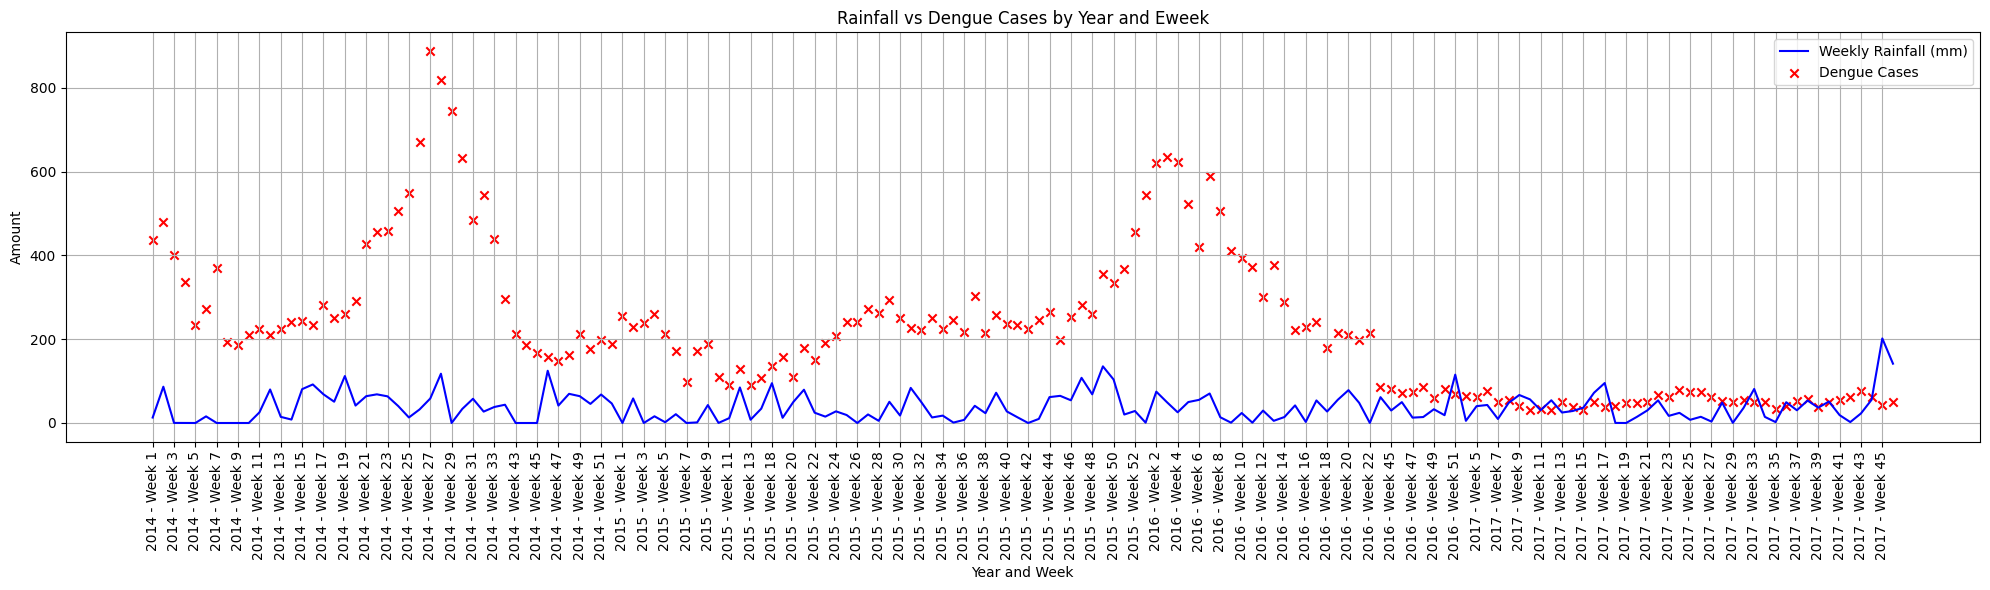

In [22]:
# Create a new column to display the year and eweek together
merged_data['Year Eweek'] = merged_data['Year'].astype(str) + ' - Week ' + merged_data['Eweek'].astype(str)

plt.figure(figsize = (20, 6))

# Plot the weekly rainfall as a line using lineplot
sns.lineplot(x = 'Year Eweek', y = 'Weekly Rainfall', data = merged_data, label = 'Weekly Rainfall (mm)', color = 'blue', linewidth = 1.5)

# Plot the dengue cases using scatterplot
sns.scatterplot(x = 'Year Eweek', y = 'Dengue Cases', data = merged_data, label = 'Dengue Cases', color = 'red', marker = 'x', linewidth = 1.5)

# Display x tick labels every 2 steps
# Reference: https://stackoverflow.com/a/49851245
tick_step = 2
plt.xticks(range(0, len(merged_data), tick_step), merged_data['Year Eweek'][::tick_step])

# Graph properties
plt.title('Rainfall vs Dengue Cases by Year and Eweek')
plt.xlabel('Year and Week')
plt.ylabel('Amount')
plt.xticks(rotation = 90)
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()


**Analysis from Rainfall vs Dengue Cases by Year and Eweek (Line Plot + Scatter Plot)**

The plot shows the relationship between weekly rainfall and dengue cases sorted by the year and epidemiological week (eweek). The X-axis represents the combined year and eweek, while the Y-axis represents the amount of weekly rainfall and the number of dengue cases. The weekly rainfall is shown as a blue line, and the dengue cases are shown as red "X" markers.

From the plot, it is clear that the dengue cases tends to cluster between 0 to 400 cases. However, a pattern can be discovered where spikes in dengue cases often follow weeks of moderate or heavy rainfall. This aligns with the lifecycle of Aedes mosquitoes, from larvae to adult mosquito requires water puddles with stagnant water, which can be formed after rainfall. At some points in the graph, there is an increases in dengue cases after one or two weeks after slightly heavier rainfall. This data lag corresponds to the mosquito larvae growing into an adult mosquito, which can spread the dengue virus.

Although most reported dengue cases are between 0 to 400 cases, there are also outliers around 600 to 800 reported cases during weeks with low or moderate rainfall. This suggests that some other factors, such as temperature, may contribute to dengue outbreaks as well.

### Correlation Between Weather Conditions and Dengue Cases (Correlation Heatmap)

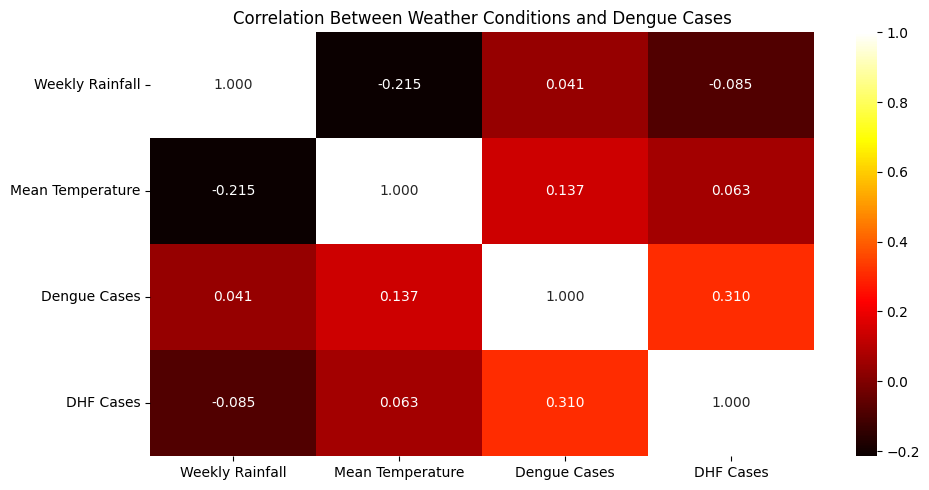

In [23]:
# Use information from the merged dataset
plt.figure(figsize = (10, 5))

# Plot the correlation matrix using heatmap
correlation_matrix = merged_data[['Weekly Rainfall', 'Mean Temperature', 'Dengue Cases', 'DHF Cases']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='hot', fmt='.3f')

# Graph properties
plt.title('Correlation Between Weather Conditions and Dengue Cases')

plt.tight_layout()
plt.show()

**Analysis from Correlation Between Weather Conditions and Dengue Cases (Correlation Heatmap)**

The heatmap shows the correlation level for weekly rainfall, mean temperature, dengue cases, and DHF cases. The colour gradient in the graph indicates the strength of the correlation, which the white and brighter red shades indicate positive correlations, while the darker shades indicate weak correlation. The correlation values are shown in each of the cell.

In the heatmap, we can see a weak correlation of 0.041 between rainfall and dengue cases. This aligns with the previous `Rainfall vs Dengue Cases by Year and Eweek (Line and Scatter Plot)` analysis, which suggested that while rainfall can contribute to dengue outbreaks, but the correlation is not as strong. The weak correlation may be due to the data lag effect, where increases in dengue cases often occurs one or two weeks after rainfall, allowing the larvaes to hatch and grow into an adult mosquitoes. The lag effect is not captured in the heatmap, as it only shows direct correlations.

In contrast to the rainfall, mean temperature has a slightly stronger positive correlation of 0.137, which indicates that temperature might be the bigger factor than rainfall for dengue outbreaks. Cooler temperature usually reduces larvae's hatching time, while warmer temperature reduces the hatching rate as well as shortening their lifespan.

DHF and dengue cases have a positive corelation of 0.31, which means DHF cases usually occur when there is a dengue outbreak as it is a severe case of regular dengue

### Distribution of Dengue Cases by Temperature (Box Plot)

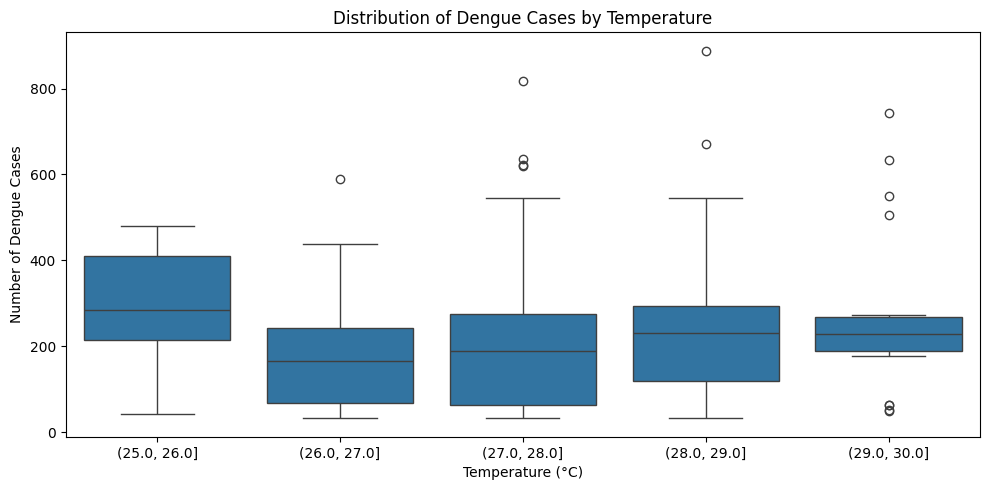

In [24]:
plt.figure(figsize = (10, 5))

# Create a boxplot to show the distribution of dengue cases by temperature
temperature_bins = pd.cut(merged_data['Mean Temperature'], bins = 5, precision = 0)
sns.boxplot(x = temperature_bins, y = 'Dengue Cases', data = merged_data)

# Graph properties
plt.title('Distribution of Dengue Cases by Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Number of Dengue Cases')

plt.tight_layout()
plt.show()

**Analysis from Distribution of Dengue Cases by Temperature (Box Plot)**

The `Correlation Between Weather Conditions and Dengue Cases (Correlation Heatmap)` showed a positive correlation between mean temperature and dengue cases, so this box plot will provide deeper insights into their relationship. The box plot displays the distribution of dengue cases across different temperature conditions. The X-axis shows temperature range in degree Celsius, while Y-axis shows the number of dengue cases. Each box in the plot represents the distribution of dengue cases within the respective temperature range.

The temperature range of 25°C to 26°C has the highest median number of dengue cases. This cool temperature range likely provides the ideal condition for Aedes mosquito, speeding up the hatching rate of the larvaes combined with a suitable temperature for hatched adult mosquito to spread the dengue virus.

While the temperature range around 26°C to 29°C provides a good virus transmission rates, they might not be as suitable for larval hatching compared to 25°C to 26°C. At the 26°C to 27°C temperature range, we can see a moderate decrease in the median dengue cases. This range remains suitable for larval development, but may be less ideal for transmission. 27°C to 28°C temperature range shows a slight increase in both median dengue cases and the number of high outlier cases with around 600 reports, suggesting that it provides a favourable condition for dengue traansmission. The temperature range around 28°C to 29°C displays another increase compared to the previous mentioned temperature range and also has the highest outlier case of around 800 reports. This indicates that while this temperature may not be ideal for larval hatching, its an ideal condition for dengue transmission. At temperature around 29°C to 30°C, it is clear that the dengue case distribution remains similar to 28°C to 29°C, indicating that it reduces the hatching rate, causing the dengue cases to remain stagnant.  However, it has the most outlier case, suggesting that this might be the most ideal temperature for dengue transmission.

### DHF vs Dengue Cases (Scatter Plot)

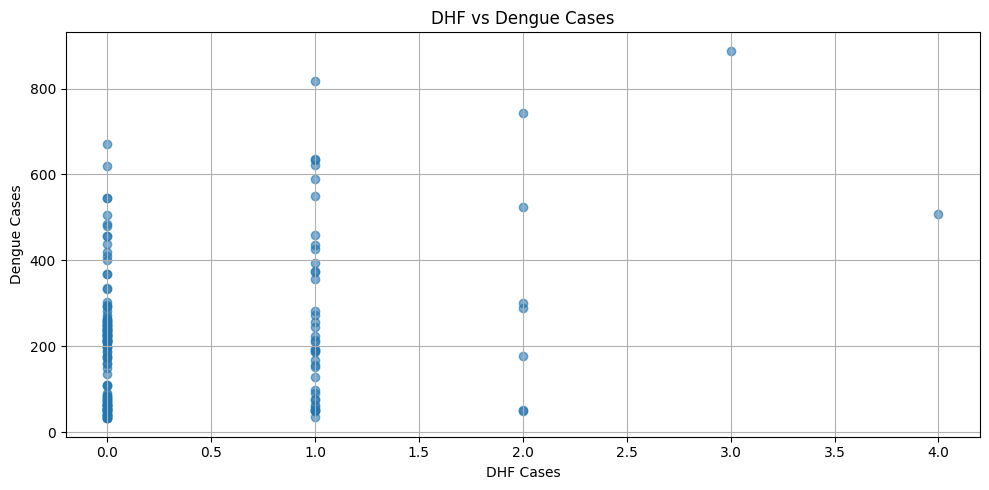

In [25]:
plt.figure(figsize = (10, 5))

# Create a scatter plot to show the relationship between DHF and Dengue cases
scatter = plt.scatter(merged_data['DHF Cases'], merged_data['Dengue Cases'], alpha = 0.6)

# Graph properties
plt.title('DHF vs Dengue Cases')
plt.xlabel('DHF Cases')
plt.ylabel('Dengue Cases')
plt.grid()

plt.tight_layout()
plt.show()

**Analysis from DHF vs Dengue Cases (Scatter Plot)**

The scatter plot displays the relationship between Dengue Hemorrhagic Fever (DHF) cases and regular dengue cases. The X-axis shows the number of DHF cases, while the Y-axis shows the number of regular dengue cases. Each dot represents the data where both DHF and dengue cases were reported.

The scatter plot shows the positive correlation between DHF and dengue cases, as shown in the `Correlation Between Weather Conditions and Dengue Cases (Correlation Heatmap)`. The clusters at low DHF cases with varying dengue cases indicates that while most infection belongs to regular dengue cases, there is a consistent risk of the regular dengue case  progressing into the severe DHF case. A clear positive correlation is displayed, indicating that higher DHF cases usually correspond to higher dengue cases. The clusters at lower DHF counts shows that even a small number of DHF cases can reflect a consistent dengue risk.

## Task 6: Machine Learning Model

The selected features for this model are Year, Eweek, Weekly Rainfall, Mean Temperature, Maximum Temperature and Monimum Temperature nd DHF Cases. These features were selected because they are the key factors that are known to influence dengue transmission.

The `Rainfall vs Dengue Cases` analysis showed that while weekly rainfall provides breeding ground for mosquitoes, its correlation with dengue cases is weak. However, since rainfall plays a role in creating a favourable conditions for mosquitoes, it is still included as a feature in the model. Additionally, the mean temperature, which had a stronger correlation with dengue cases is also include because temperature ranges are critical for the mosquito lifecycles, as shown in the `Distribution of Dengue Cases by Temperature` analysis showing that the temperature range of 25°C to 26°C is the most favourable for dengue outbreaks.

Maximum Temperature and Minimum Temperature are also selected as a features because they may be a factor that influence mosquito activity and lifespan. Furthermore, DHF Cases is also selected becaused of the strong correlation between DHF and regular dengue cases, which is shown in the `Correlation Between Weather Conditions and Dengue Cases` and the `DHF vs Dengue Cases` in Task 5. DHF cases often occurs during severe dengue outbreaks, providing useful information to the model.

The label for this model is Dengue Cases. This the outcome I aim to predict using the features mentioned above using the Python machine learning library, `scikit-learn`.



In [26]:
%pip install scikit-learn

In [27]:
# Import libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import mean_squared_error, r2_score

In [28]:
# Identify the features and label
features = ['Year', 'Eweek','Weekly Rainfall', 'Mean Temperature', 'DHF Cases']
label = 'Dengue Cases'

X = merged_data[features]
y = merged_data[label]

print('Features:\n', X)
print('\n----------------')
print('\nLabel:\n', y)

Features:
      Year  Eweek  Weekly Rainfall  Mean Temperature  DHF Cases
0    2014      1             13.0         25.825000        1.0
1    2014      2             86.6         26.157143        0.0
2    2014      3              0.2         25.757143        0.0
3    2014      4              0.0         25.271429        0.0
4    2014      5              0.0         25.671429        0.0
..    ...    ...              ...               ...        ...
159  2017     42              2.2         29.614286        1.0
160  2017     43             22.8         27.642857        0.0
161  2017     44             55.6         27.157143        0.0
162  2017     45            201.8         26.400000        0.0
163  2017     46            141.6         27.328571        0.0

[164 rows x 5 columns]

----------------

Label:
 0      436.0
1      479.0
2      401.0
3      336.0
4      234.0
       ...  
159     62.0
160     77.0
161     62.0
162     44.0
163     50.0
Name: Dengue Cases, Length: 164, dtype:

In [29]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.1, random_state=42)
print('Training set\n-------------')
print('X train:', X_train.shape)
print('y train:', y_train.shape)

Training set
-------------
X train: (147, 5)
y train: (147,)


In [30]:
# Create a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [31]:
# Predict the dengue cases
y_pred = model.predict(X_test)

In [32]:
# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [33]:
# Print the model performance
print(f'Intercept:\n {model.intercept_:.3f}')
print('\nCoefficients:\n', model.coef_)
print(f'\nMean Squared Error:\n {mse:.3f}')
print(f'\nR² Score:\n {r2:.3f}')

Intercept:
 171653.844

Coefficients:
 [-85.58615583  -2.30913819   0.89774524  38.28555418  66.21084258]

Mean Squared Error:
 21413.403

R² Score:
 0.492


### Predicted vs Actual Dengue Cases

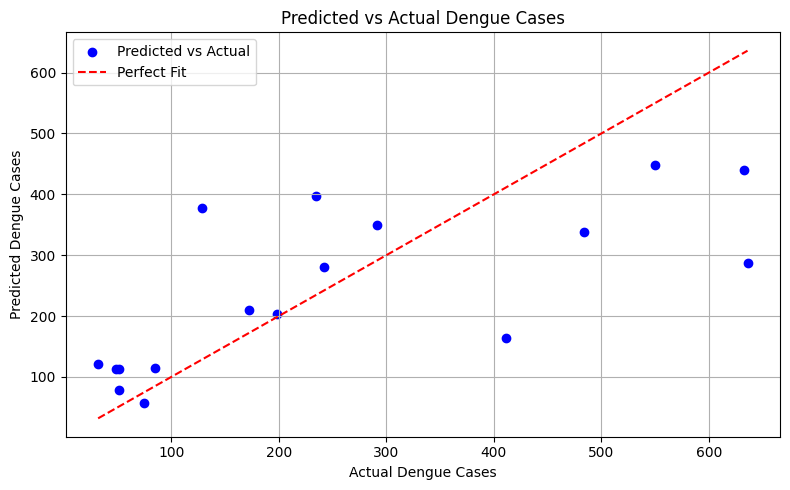

In [34]:
plt.figure(figsize = (8, 5))

# Scatter plot of actual vs predicted dengue cases
plt.scatter(y_test, y_pred, color = 'blue', label = 'Predicted vs Actual')
# Perfect fit line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label = 'Perfect Fit')

# Graph properties
plt.xlabel('Actual Dengue Cases')
plt.ylabel('Predicted Dengue Cases')
plt.title('Predicted vs Actual Dengue Cases')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

**Model Evaluation from Predicted vs Actual Dengue Cases (Scatter Plot with Best Fit Line)**

From the `Predicted vs Actual Dengue Cases` graph above, while it provides some insights, it suggest that further preprocessing might still be required to improve its accuracy. After splitting the 90% of the data into a training set and the leftover 10% as the test set, the predicted and actual dengue case still shows some discrepancy, indicating that the model deos not perfectly fit the data. The MSE and R² score also suggest that the model has yet to completely capture the underlying pattern of the data. A data lag feature could be implemented 

## Task 7: Validation

For this project, cross validation method will be applied to validate the model's result. It is a method that divdes the provided data into multiple folds and test the model on each one. This ensures all data are used for both training and testing, reducing bias in the validation.

In [35]:
from sklearn.model_selection import cross_val_score as cvs
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import make_scorer as ms

In [36]:
# Create a mean absolute error scorer to evaluate the model
mae_scorer = ms(mae, greater_is_better = False)

# Perform 5 fold cross validation
r2_scores = cvs(model, X, y, cv = 5, scoring = 'r2')
mae_scores = cvs(model, X, y, cv = 5, scoring = mae_scorer)

# Print the result of each fold
for i in range(5):
  print(f'\nFold {i + 1}:')
  print(f'- R² Score: {r2_scores[i]:.3f}')
  print(f'- Mean Absolute Error: {mae_scores[i]:.3f}')

# Print the mean and standard deviation of the R² scores
print(f'\nMean R² Scores: {r2_scores.mean():.3f}')
print(f'Standard Deviation of R² Scores: {r2_scores.std():.3f}')

# Print the mean and standard deviation of the MAE
print(f'\nMean MAE: {mae_scores.mean():.3f}')
print(f'Standard Deviation of MAE: {mae_scores.std():.3f}')


Fold 1:
- R² Score: 0.030
- Mean Absolute Error: -153.868

Fold 2:
- R² Score: -8.560
- Mean Absolute Error: -134.656

Fold 3:
- R² Score: -0.748
- Mean Absolute Error: -105.801

Fold 4:
- R² Score: 0.596
- Mean Absolute Error: -60.140

Fold 5:
- R² Score: -51.361
- Mean Absolute Error: -72.731

Mean R² Scores: -12.009
Standard Deviation of R² Scores: 19.956

Mean MAE: -105.439
Standard Deviation of MAE: 35.555


**Cross Validation Result Analysis**

The R² scores vary across the folds, with some folds showing positive values, indicating slight accurate prediction, and others showing negative values, indicating some misprediction. The mean R² score comes out negative, suggesting that the model is not performing that well. The rather high standard deviation also suggests the model's performance is unstable across the folds.

The Mean Abosolute Error (MAE) are high, indicating that the model's predictions are not as accurate. The mean MAE also suggests that the model's prediction are off by a mean of around 105 cases. The standard deviation of the MAE is also high, suggesting that the model's performance can unstable across the folds.

The cross validation reuslt indicates that the current linear regression model is not performing well in predicting dengue cases. The R² scores and MAE suggest that the model is not capturing the patterns in the data effectively. To boost the model's accuracy, more relevant features can be added to better understand the pattern and relationship between the data. Addtiionally, preprocessing the outliers or implementing a feature that handles the data lag effect can also boost the model's prediction accuracy.

## Task 8: Feature Engineering

To improve the performance of the linear regression model, polynomial features can be incorporated to capture the non-linear relationships between data features and label. By incorporating polynomial features, it might enhance the model's prediction accuracy, allowing it to predict dengue outbreaks more accurately. 


Additionally, a pipeline is utilised to streamline the transformation and model training process. The pipeline ensures that all transformations and model fitting runs in the expected order, maintaining consitency between training and test data. This not only reduces the risk of coding errors, but also prevent data leakage.

In [37]:
# Import libraries
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [38]:
# Create a pipeline for polynomial features and linear regression to streamline the process
model = make_pipeline(PolynomialFeatures(degree = 2), LinearRegression())

In [39]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.1, random_state = 42)

In [40]:
# Fit the model with the training data
model.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [41]:
# Predict the dengue cases
y_pred = model.predict(X_test)

In [42]:
# Evaluate the model performance
mae_poly = mae(y_test, y_pred)
r2_poly = r2_score(y_test, y_pred)

# Print the model performance
print(f'Mean Absolute Error: {mae_poly:.3f}')
print(f'R² Score {r2_poly:.3f}')

Mean Absolute Error: 98.330
R² Score 0.596


### Predicted vs Actual Dengue Cases incorporating Polynomial Features

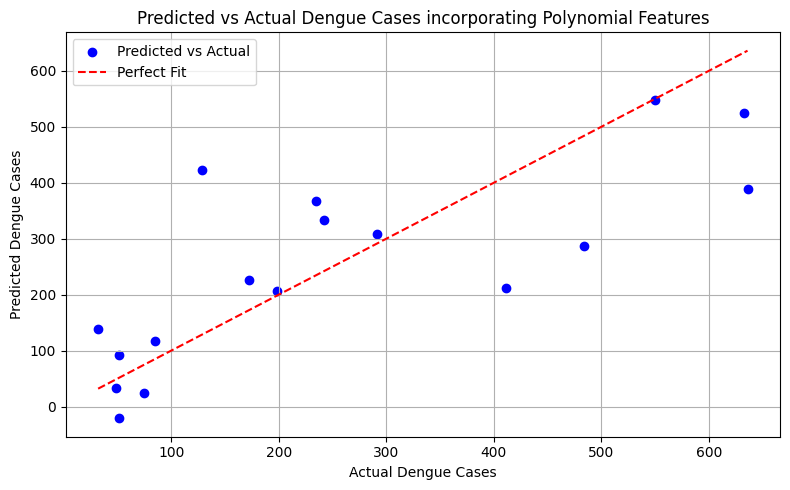

In [43]:
plt.figure(figsize = (8, 5))

# Scatter plot of actual vs predicted dengue cases
plt.scatter(y_test, y_pred, color = 'blue', label = 'Predicted vs Actual')
# Perfect fit line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label = 'Perfect Fit')

# Graph properties
plt.xlabel('Actual Dengue Cases')
plt.ylabel('Predicted Dengue Cases')
plt.title('Predicted vs Actual Dengue Cases incorporating Polynomial Features')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

**Comparison between Polynomial Feature Model and Linear Regression Model**

The polynomial feature model significantly reduced the MAE to 98.33 compared to the linear regression model's MAE of 21413.403. This indicates that the polynomial feature model provides more accurate predictions of dengue cases.

The polynomial feature model has an R² score of 0.596, which is higher than the linear regression model's R² score of 0.492. This indicates that the polynomial feature model captures more variance in the data compared to the linear regression model. The higher R² score indicates that the polynomial model fits the data better.

The `Predicted vs Actual Dengue Cases incorporating Polynomial Features` shows the prediction dots that were plotted closer to the perfect fit line compared to the linear regression model. This aligns with the improved accuracy of the polynomial feature model.

The polynomial feature model performs better than the linear regression model by predicting the dengue cases more accurately. By incorporating polynomial features to the model, it allows the model to capture non-linear relationships in the data, leading to more accurate predictions of dengue cases.